# KSA: Polar Observations and Modelling

## Week 6 - Gridded data

We have worked with CTD profiles in the previous classes. CTDs are the best quality data we can obtain, but oceanographic cruises are very expensive to run. There are a number of other way to observe the ocean that are cheaper and can provide better space and time coverage, although somewhat at the expense of quality. 

#### Argo floats

A really important observing system is the network of [Argo floats](https://www.aoml.noaa.gov/argo/). These are autonomous profiling buoys that drift with the ocean's currents, going up and down through the water column measuring temperature and salinity and periodically re-surface to transmit data via satellite.

They Argo network provides something around 100.000 profiles a year, and each of them has a lifespan of around 5 years. To put this into context: the I09S CTD data we have been working on consists in around 70 CTD profiles, which took around 1 month to obtain, using a ship (RV Investigator) that has an operational cost of around $150k. That is $4.5 million dollars. Of course, the Investigator allows for much more science to happen on board, not just CTD profiles. 

In any case, Argo really are a before and after for our ocean observing system - we talk about a "pre-Argo" and "post-Argo" period. And recently they have started carrying sensors other than just temperature and salinity (i.e. nytrogen sensors), some are able to resist higher pressures and go deeper into the ocean, and even navigate in ice covered areas.

#### Other observations

There are other types of in-situ observing systems. One that is takng importance around the hard-to-access Antarctic margins is the marine observing mammals. Essentially, small sensors are glued on, for example elephant seals, as these mammals usually dive deep when foraging for food. The sensors drop off during the molt season. 

Another very cheap type of sensor is the XBT (eXpendable BathyTermograph), which measures pressure and temperature during the upper ~500m of the water column. It is disposable, does not require any expertise to deploy, and is usually "oportunistic", meaning that we can give cargo ships and other non-oceanographic vessels a bunch of XBTs to deploy with no cost other than their purchase.

### Putting everything together

Using statistical and numerical techniques, all the observations we have available in the ocean can be put together into a "gridded" product. Gridded products are nice and easy to work with. We don't need to spend time and effort doing fancy interpolations (like in `1_Building_a_cross_section.ipynb`), we can just grab a dataset with time, longitude, and latitude information that works out of the box!

However, it is really important to understand the limitations of the dataset. For example, in the Southern Ocean, data is scarse in regions of extensive sea ice cover like the southwestern Weddell Sea, and winter observations are very, very few. So even thoug our gridded product will have information in those regions, it is not to be trusted blindly.

*Food for thought: what do you think is more reliable, surface or deep data?*

## EN.4.2.2

This class we are going to work with a gridded product developed by MetOffice in the UK called [EN.4.2.2.](https://www.metoffice.gov.uk/hadobs/en4/index.html). This product contains CTD, XBT and Argo profiles amongst others, interpolated onto a horizontal grid of $1 ^{\circ} \times 1 ^{\circ}$ (1 degree latitude and 1 degree longitude), and 50 vertical levels. Unlike the previous data we have used in the first week, these vertical levels are *depth*, not pressure.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm
import gsw
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [3]:
import os
os.chdir('/home/561/jn8053/g_jk72/KSA_Observations_Modelling/Class3/')

Let's open our gridded product. As the name says, this dataset contains annual averages from the year 1970 to 2021.

In [4]:
EN422 = xr.open_dataset('data/EN422_annual_averages_1970-2021.nc')
EN422

<xarray.Dataset> Size: 2GB
Dimensions:                          (depth: 42, lat: 49, time: 52, lon: 360,
                                      bnds: 2)
Coordinates:
  * depth                            (depth) float32 168B 5.022 ... 5.35e+03
  * lat                              (lat) float32 196B -83.0 -82.0 ... -35.0
  * time                             (time) datetime64[ns] 416B 1970-07-01T16...
  * lon                              (lon) float32 1kB -180.0 -179.0 ... 179.0
Dimensions without coordinates: bnds
Data variables:
    temperature                      (time, depth, lat, lon) float64 308MB ...
    salinity                         (time, depth, lat, lon) float64 308MB ...
    temperature_uncertainty          (time, depth, lat, lon) float64 308MB ...
    salinity_uncertainty             (time, depth, lat, lon) float64 308MB ...
    temperature_observation_weights  (time, depth, lat, lon) float32 154MB ...
    salinity_observation_weights     (time, depth, lat, lon) float32 154MB ...
    time_bnds                        (time, bnds) datetime64[ns] 832B ...
    depth_bnds                       (depth, bnds) float32 336B ...
Attributes: (12/23)
    Conventions:            CF-1.0
    title:                  Temperature and salinity analysis
    DSD_entry_id:           UKMO-L4UHFnd-GLOB-v01
    references:             Website and paper: https://www.metoffice.gov.uk/h...
    institution:            UK Met Office
    contact:                Rachel Killick - rachel.killick@metoffice.gov.uk
    ...                     ...
    northernmost_latitude:  89.5
    westernmost_longitude:  0.5
    easternmost_longitude:  362.5
    file_quality_index:     0
    licence:                EN4 is distributed under the Non Commercial Gover...
    NCO:                    netCDF Operators version 5.0.7 (Homepage = http:/...

Let's plot mean temperature and mean salinity at the surface:

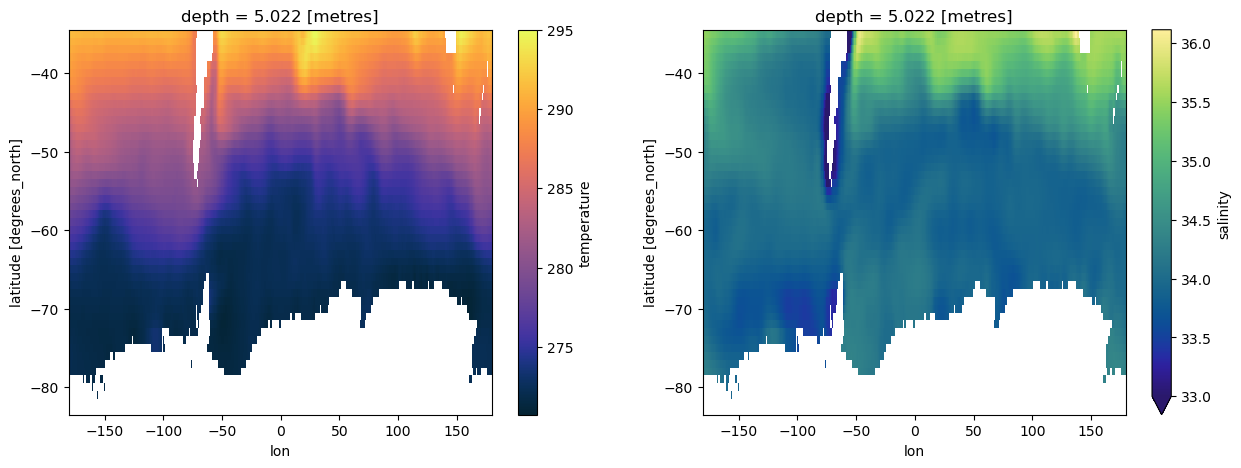

In [14]:
fig = plt.figure(figsize = (15,5))
axs = [fig.add_subplot(121), fig.add_subplot(122)]

EN422['temperature'].mean('time').sel(depth = 0, method = 'nearest').plot(ax = axs[0], cmap = cm.cm.thermal)
EN422['salinity'].mean('time').sel(depth = 0, method = 'nearest').plot(ax = axs[1], cmap = cm.cm.haline, vmin = 33);

#### Question 1

There's something strange happening in the land in the plots above. Can you see what it is? Do you think it is real?

What do you think about the temperatures? A little high, no? Fix it!

*Answer here*

## Exploration of data included in EN4.2.2

Let's put this dataset in context, looking at the number of observations that are been included, per year, as well as their locations. 

In [36]:
number_of_profiles = xr.open_dataset('data/EN422_number_of_profiles.nc')

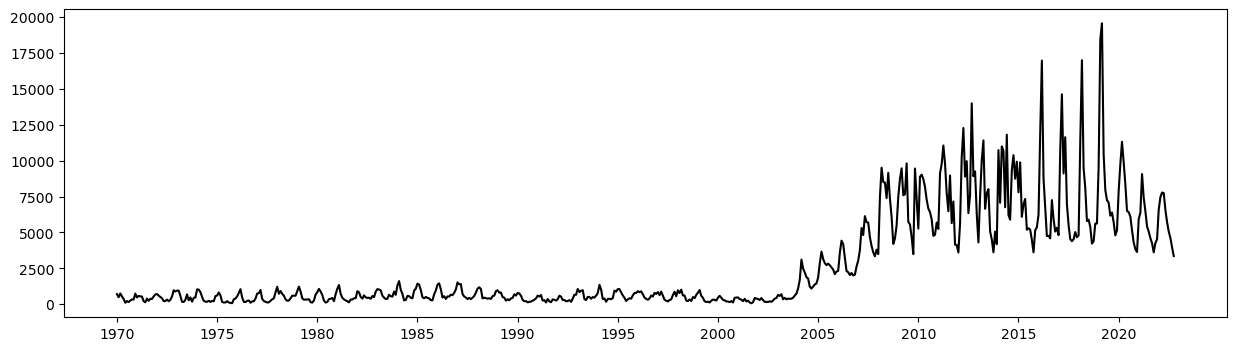

In [43]:
plt.figure(figsize = (15, 4))
plt.plot(number_of_profiles['N_profiles'], color = 'k')
plt.xticks(np.arange(0, 634, 12*5),     # Placing ticks every five years (12 months times 5)
           np.arange(1970, 2022, 5));   # Placing the labels

#### Question 2

1. What are the little wiggles in the data?

2. What's behind the big increase around 2005?

*Answer here*

Now let's look at the locations:

In [65]:
locations = xr.open_dataset('data/EN422_profile_locations.nc')

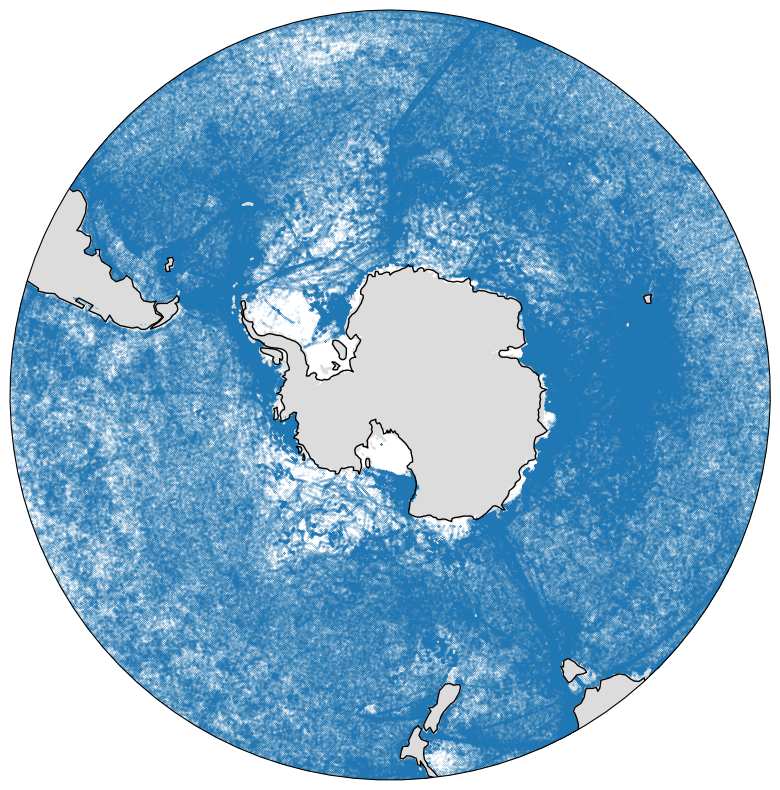

In [71]:
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection = ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -80, -35], crs = ccrs.PlateCarree())
ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='gainsboro',
                                        facecolor='gainsboro'))
ax.coastlines(resolution = "110m")
# Map the plot boundaries to a circle
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
for d in locations['date']:
    plt.scatter(locations['longitude'].sel(date = d).values, 
                locations['latitude'].sel(date = d.values),
                s = 0.01, c = 'C0', transform = ccrs.PlateCarree())

Doesn't look that bad! *But remember this is ALL the profiles since 1970*.

Let's look at all the profiles taken in January, and all the profiles taken in July:

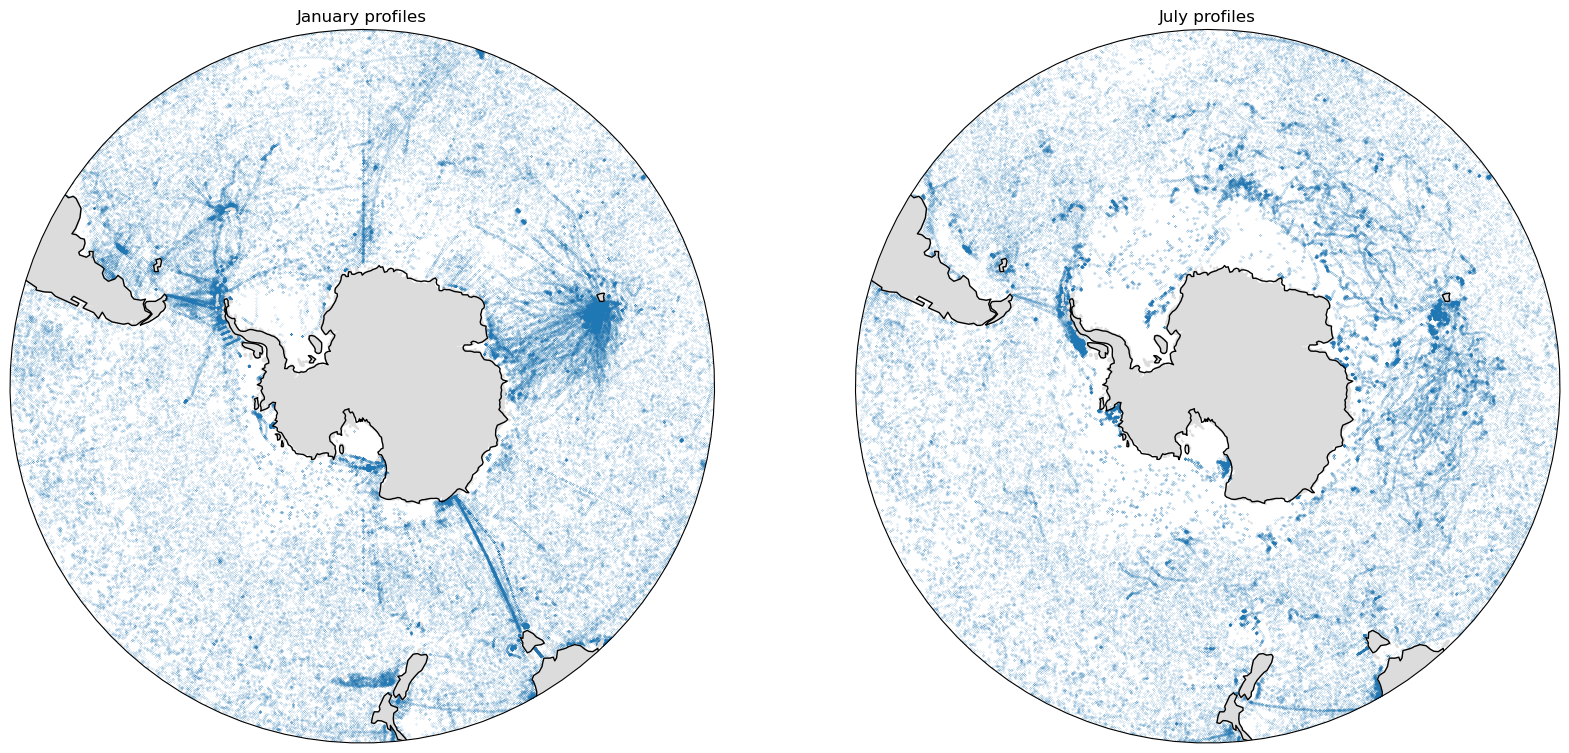

In [78]:
fig = plt.figure(figsize = (20, 10))
axs = [fig.add_subplot(121, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(122, projection = ccrs.SouthPolarStereo())]
for ax in axs:
    ax.set_extent([-180, 180, -80, -35], crs = ccrs.PlateCarree())
    ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='gainsboro',
                                            facecolor='gainsboro'))
    ax.coastlines(resolution = "110m")
    # Map the plot boundaries to a circle
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)
for d in locations['date'][::12]:
    axs[0].scatter(locations['longitude'].sel(date = d).values, 
                   locations['latitude'].sel(date = d.values),
                   s = 0.01, c = 'C0', transform = ccrs.PlateCarree())
for d in locations['date'][7::12]:
    axs[1].scatter(locations['longitude'].sel(date = d).values, 
                   locations['latitude'].sel(date = d.values),
                   s = 0.01, c = 'C0', transform = ccrs.PlateCarree())
    
axs[0].set_title('January profiles')
axs[1].set_title('July profiles');

#### Question 3

1. Using a combination of the number of profiles per month since 1970, and the locations information, can you find out which month of the year has the most observations and which the least?

2. With all this information, discuss what preccautions you would take when using the EN4.2.2. dataset.

3. What other important information on the profiles we have we not explored yet?

*Answer here*

# Zonal average

Now that we have a better grasp of what our dataset contains, and its limitations, we can start analysing it. We will start by calculating a zonal average, which is just the mean in longitude space.

In [7]:
temp_zonal_ave = EN422['temperature'].mean('lon')
salt_zonal_ave = EN422['salinity'].mean('lon')

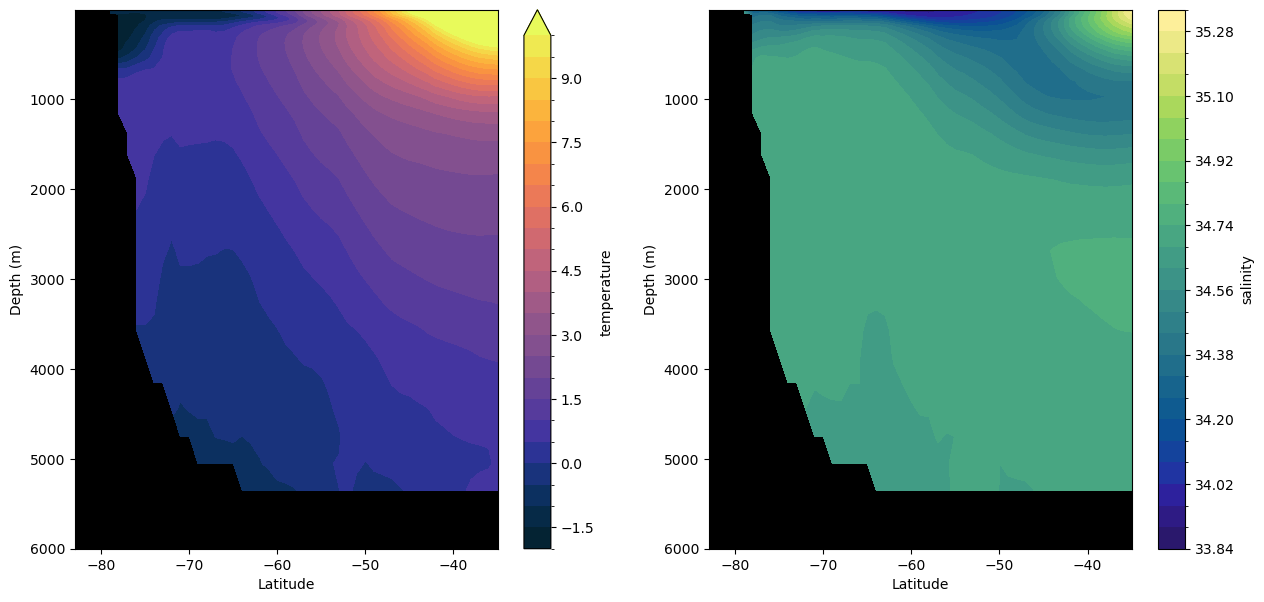

In [8]:
fig = plt.figure(figsize = (15,7))
axs = [fig.add_subplot(121), fig.add_subplot(122)]

temp_zonal_ave.mean('time').plot.contourf(ax = axs[0], cmap = cm.cm.thermal, levels = 25,
                                          vmin = -2, vmax = 10)
salt_zonal_ave.mean('time').plot.contourf(ax = axs[1], cmap = cm.cm.haline, levels = 25)

for ax in axs:
    ax.invert_yaxis()
    ax.set_ylim(6000, None)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Depth (m)');   
    ax.set_facecolor('k');

# Temperature and salinity changes

Let's look at how the temperature and salinity in the Southern Ocean have changed in the observational period. 

## Spatial pattern of change

Let's begin by looking at the difference between the last decade and the first decade of the dataset!

In [34]:
temp_2010_2020 = EN422['temperature'].sel(time = slice('2010-01-01', '2020-12-31')).mean('time')
temp_1970_1980 = EN422['temperature'].sel(time = slice('1970-01-01', '1980-12-31')).mean('time')

salt_2010_2020 = EN422['salinity'].sel(time = slice('2010-01-01', '2020-12-31')).mean('time')
salt_1970_1980 = EN422['salinity'].sel(time = slice('1970-01-01', '1980-12-31')).mean('time')

In [35]:
surface_temp_change = (temp_2010_2020 - temp_1970_1980).isel(depth = 0)
surface_salt_change = (salt_2010_2020 - salt_1970_1980).isel(depth = 0)

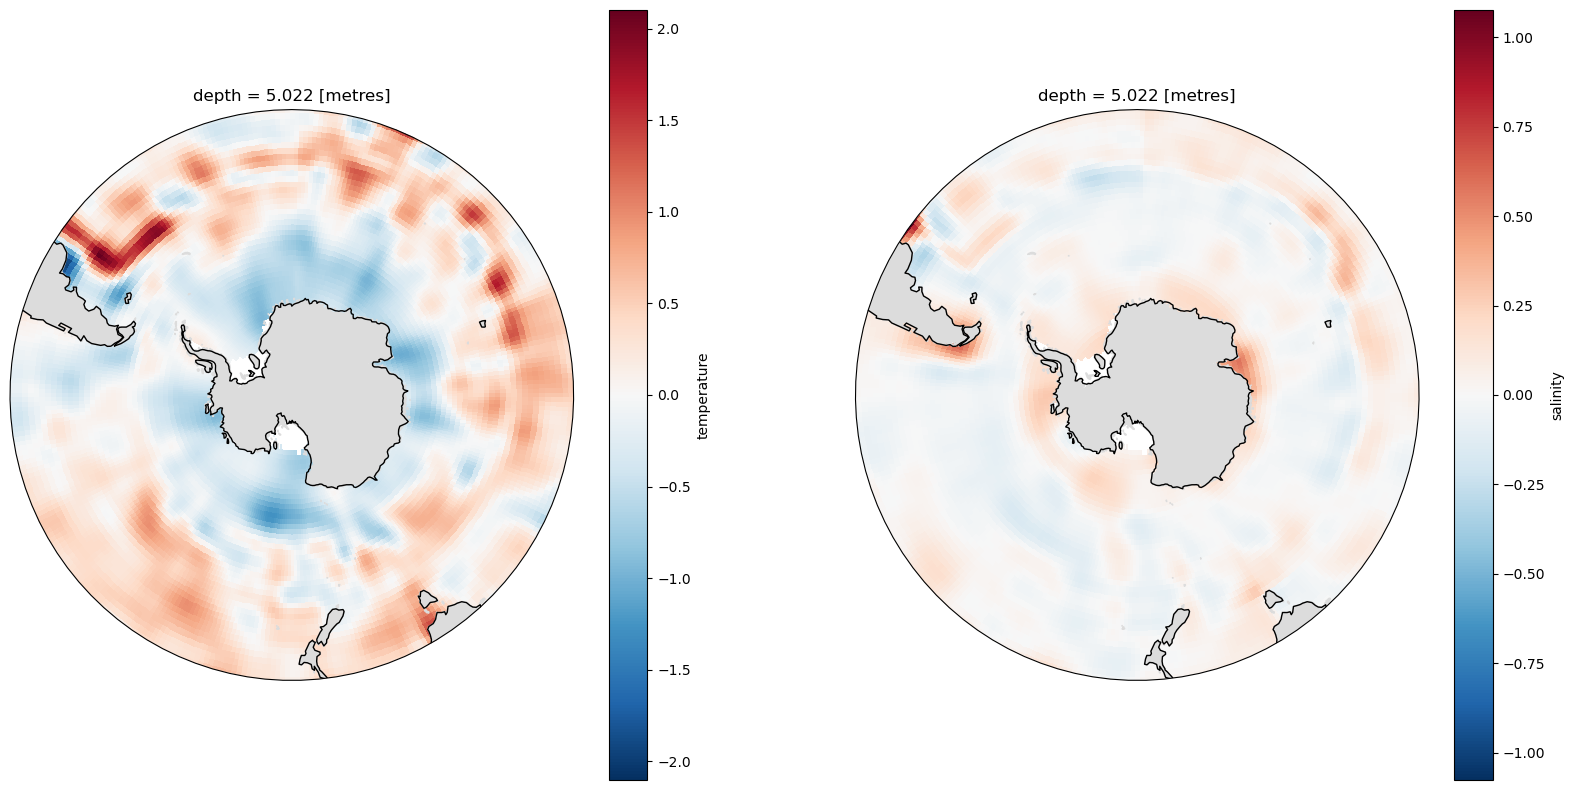

In [40]:
fig = plt.figure(figsize = (20, 10))
axs = [fig.add_subplot(121, projection = ccrs.SouthPolarStereo()),
       fig.add_subplot(122, projection = ccrs.SouthPolarStereo())]
for ax in axs:
    ax.set_extent([-180, 180, -80, -35], crs = ccrs.PlateCarree())
    ax.add_feature(cft.NaturalEarthFeature('physical', 'land', '50m',
                                            edgecolor='gainsboro',
                                            facecolor='gainsboro'))
    ax.coastlines(resolution = "110m")
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

surface_temp_change.plot(ax = axs[0], cmap = 'RdBu_r',
                         transform = ccrs.PlateCarree())
surface_salt_change.plot(ax = axs[1], cmap = 'RdBu_r',
                         transform = ccrs.PlateCarree());

#### Question 4

Can you make this plot a bit nicer? Shrink the colorbars, add labels and a title? Choose appropriate ranges for the colorbar to better visualize the changes.

*Answer here*

#### Question 5

Now plot the zonal average of the changes. Use the code where we plotted our `temp_zonal_ave`, but instead of the mean temperature, plot difference between the last decade and the initial decade. 

Use an appropriate colorbar - usually when plotting a difference or an anomaly, we choose a "diverging" colorbar, where the zero tends to white, and positive and negative values have different colors.

## Vertical structure of change

Let's try another way of visualising this changes. We will do a spatial average and plot depth vs years. We will begin by the most straighforward way of averaging, using `.mean()` over the latitude, longitude dimensions:

In [54]:
temp_time_series = EN422['temperature'].mean(['lat','lon'])
salt_time_series = EN422['salinity'].mean(['lat', 'lon'])

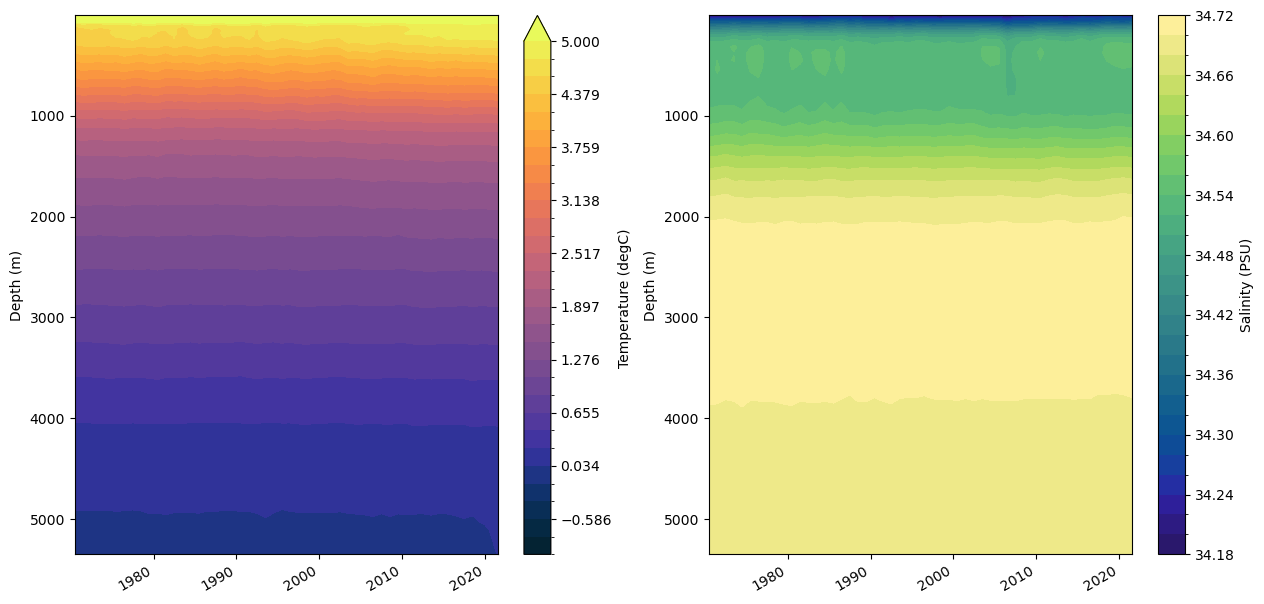

In [68]:
fig = plt.figure(figsize = (15,7))
axs = [fig.add_subplot(121), fig.add_subplot(122)]

temp_time_series.transpose().plot.contourf(ax = axs[0], vmin = -1, vmax = 5, levels = 30,
                                           cmap = cm.cm.thermal, 
                                           cbar_kwargs = {'label':'Temperature (degC)'})
salt_time_series.transpose().plot.contourf(ax = axs[1],  levels = 30,
                                           cmap = cm.cm.haline, 
                                           cbar_kwargs = {'label':'Salinity (PSU)'})
for ax in axs:
    ax.invert_yaxis()
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('');

Let's zoom in at the surface:

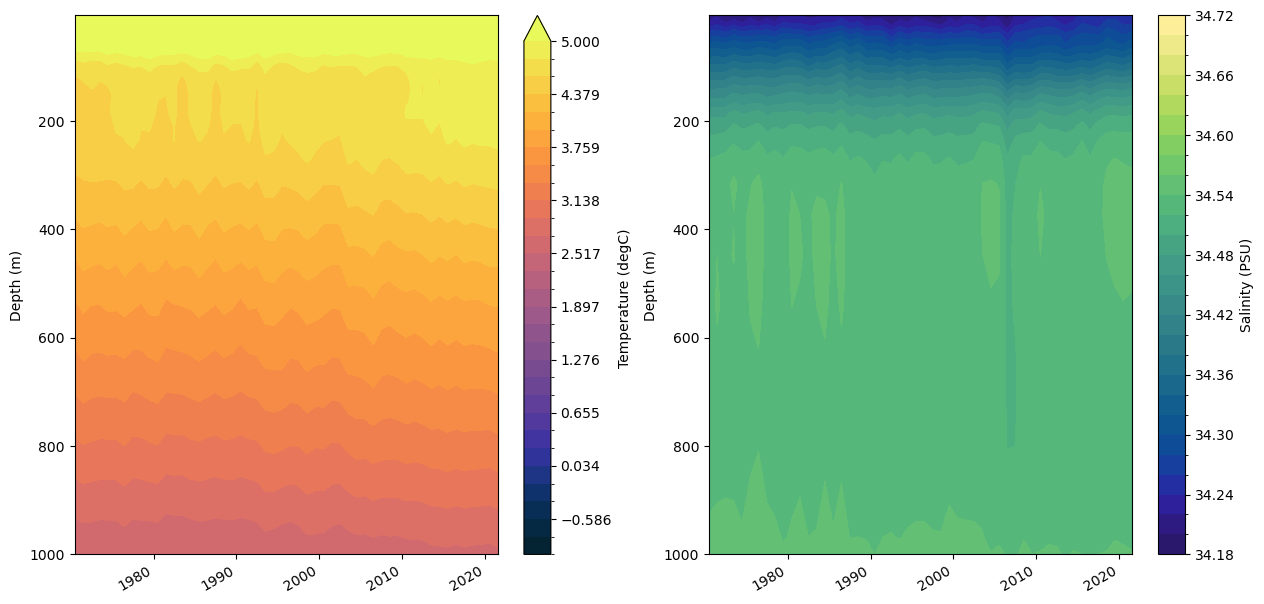

In [76]:
fig = plt.figure(figsize = (15,7))
axs = [fig.add_subplot(121), fig.add_subplot(122)]

temp_time_series.transpose().plot.contourf(ax = axs[0], vmin = -1, vmax = 5, levels = 30,
                                           cmap = cm.cm.thermal, 
                                           cbar_kwargs = {'label':'Temperature (degC)'})
salt_time_series.transpose().plot.contourf(ax = axs[1],  levels = 30,
                                           cmap = cm.cm.haline, 
                                           cbar_kwargs = {'label':'Salinity (PSU)'})
for ax in axs:
    ax.invert_yaxis()
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('');
    ax.set_ylim(1000, None)

#### Question 6

Describe the changes that you can see in the spatial maps and the depth vs year plots.

Can you think of other ways of visualising changes?

*Answer here*

#### Question 7

Can you calculate density using the `gsw` library? Repeat the plots we have done with temperature and salinity and describe the changes you observe. 

*Answer here*